In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2 as pg2
%matplotlib inline

In [5]:

def pre(df):
    Q1 = df['views'].quantile(0.25)
    Q3 = df['views'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range.

    return (df['views'] >= Q1 - 1.5 * IQR) & (df['views'] <= Q3 + 1.5 *IQR)

conn = pg2.connect(
        database="createtrend",
        user="muna",
        password="muna112358!",
        host="ec2-13-124-107-195.ap-northeast-2.compute.amazonaws.com",
        port="5432",
    )


In [16]:
df = pd.read_sql("""SELECT *
FROM (SELECT video.idx,
             video_name || ' ' || logo as names,
             video_name,
             video_description,
             video_id,
             upload_time,
             channel_idx,
--              processed,
             thumbnail_url,
--              thumbnail_processed,
--              forbidden,
--              status,
             popularity,
             logo,
             jvv.views,
             check_time
      FROM video
               JOIN thumbnail_logo tl ON video.idx = tl.video_idx
               JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
                     FROM video_views AS vv
                     GROUP BY vv.video_idx, vv.views, vv.check_time
                     ORDER BY vv.video_idx, vv.check_time DESC) AS jvv ON video.idx = jvv.video_idx) joined_vv
WHERE channel_idx IN);""", con=conn)


<AxesSubplot:>

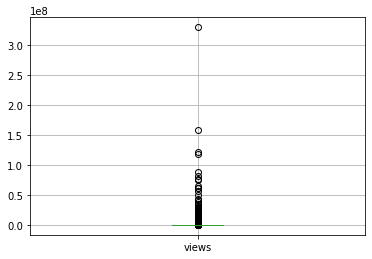

In [18]:
df.boxplot('views')

{'whiskers': [<matplotlib.lines.Line2D at 0x147b211aa48>,
 'caps': [<matplotlib.lines.Line2D at 0x147b2124308>,
 'boxes': [<matplotlib.lines.Line2D at 0x147fbebd588>,
 'medians': [<matplotlib.lines.Line2D at 0x147db3cb548>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x147db3cb588>,
  <matplotlib.lines.Line2D at 0x147fa201688>]}

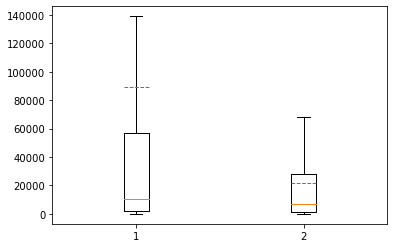

In [34]:
Q1 = df['views'].quantile(0.25)
Q3 = df['views'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.

filter = (df['views'] >= Q1 - 1.5 * IQR) & (df['views'] <= Q3 + 1.5 *IQR)
plt.boxplot ([df['views'],df.loc[filter]['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)



상위 50%의 채널에 대한 조회수 box와 outlier를 1차적으로 제거한 box

In [35]:
df_movie_channel = pd.read_sql("""SELECT *
FROM (SELECT video.idx,
             video_name || ' ' || logo as names,
             video_name,
             video_description,
             video_id,
             upload_time,
             channel_idx,
             thumbnail_url,
             popularity,
             logo,
             jvv.views,
             check_time
      FROM video
               JOIN thumbnail_logo tl ON video.idx = tl.video_idx
               JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
                     FROM video_views AS vv
                     GROUP BY vv.video_idx, vv.views, vv.check_time
                     ORDER BY vv.video_idx, vv.check_time DESC) AS jvv ON video.idx = jvv.video_idx) joined_vv
WHERE channel_idx IN (12, 148, 156, 60, 17, 26, 94, 168, 55, 1588, 14, 133, 51, 161, 23, 70, 99, 211, 119, 30, 95, 117, 29, 83, 123,
       113, 38, 103, 147, 124, 220, 263, 215, 122, 66, 201, 71, 72, 163, 153, 2, 80, 182, 207, 76, 89, 172, 98, 9, 197);""", con=conn)



{'whiskers': [<matplotlib.lines.Line2D at 0x147b17d0588>,
 'caps': [<matplotlib.lines.Line2D at 0x147d6138d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x147d614be08>,
 'medians': [<matplotlib.lines.Line2D at 0x147d6138e88>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x147b4ca3448>,
  <matplotlib.lines.Line2D at 0x147cd3ded88>]}

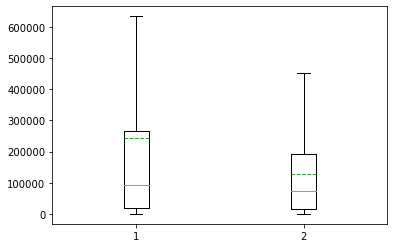

In [41]:
df_mc_filter = pre(df_movie_channel)

plt.boxplot ([df_movie_channel['views'],df_movie_channel.loc[df_mc_filter]['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)

영화 채널, 영화 채널 (oulier 제거)

{'whiskers': [<matplotlib.lines.Line2D at 0x147cf3db448>,
 'caps': [<matplotlib.lines.Line2D at 0x147de94fc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x147de9611c8>,
 'medians': [<matplotlib.lines.Line2D at 0x147de93aa08>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x147de965648>,
  <matplotlib.lines.Line2D at 0x147b883df08>]}

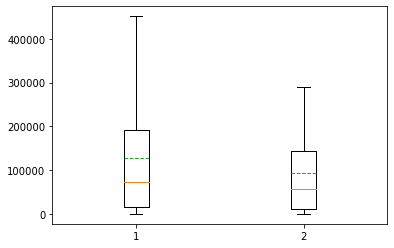

In [42]:
df_movie_channel_shock = pd.read_sql("""SELECT *
FROM (SELECT video.idx,
             video_name || ' ' || logo as names,
             video_name,
             video_description,
             video_id,
             upload_time,
             channel_idx,
             thumbnail_url,
             popularity,
             logo,
             jvv.views,
             check_time
      FROM video
               JOIN thumbnail_logo tl ON video.idx = tl.video_idx
               JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
                     FROM video_views AS vv
                     GROUP BY vv.video_idx, vv.views, vv.check_time
                     ORDER BY vv.video_idx, vv.check_time DESC) AS jvv ON video.idx = jvv.video_idx) joined_vv
WHERE (names ~ '.*충[ ]*격.*' OR names ~ '.*실[ ]*화.*')
  AND channel_idx IN
      (12, 148, 156, 60, 17, 26, 94, 168, 55, 1588, 14, 133, 51, 161, 23, 70, 99, 211, 119, 30, 95, 117, 29, 83, 123,
       113, 38, 103, 147, 124, 220, 263, 215, 122, 66, 201, 71, 72, 163, 153, 2, 80, 182, 207, 76, 89, 172, 98, 9, 197);""", con=conn)

df_mcs_filter = pre(df_movie_channel_shock)
plt.boxplot ([df_movie_channel.loc[df_mc_filter]['views'],df_movie_channel_shock.loc[df_mcs_filter]['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)

영화 채널의 조회수 분포, 충격 실화 키워드가 포함도니 영상의 조회수 분포

{'whiskers': [<matplotlib.lines.Line2D at 0x147dbc01c88>,
 'caps': [<matplotlib.lines.Line2D at 0x147d092be08>,
 'boxes': [<matplotlib.lines.Line2D at 0x147d092b4c8>,
 'medians': [<matplotlib.lines.Line2D at 0x147abc8fc88>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x147abc8fc48>,
  <matplotlib.lines.Line2D at 0x147d65a0c08>]}

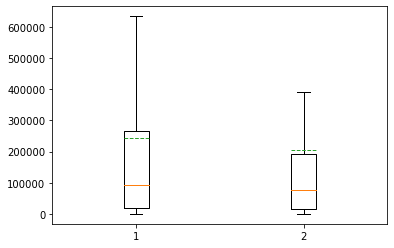

In [59]:
plt.boxplot ([df_movie_channel['views'],df_movie_channel_shock['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x147cf3a2808>,
 'caps': [<matplotlib.lines.Line2D at 0x147b8830e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x147cf3cc408>,
 'medians': [<matplotlib.lines.Line2D at 0x147cf3b9f48>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x147cf3b9d08>,
  <matplotlib.lines.Line2D at 0x147bc207488>]}

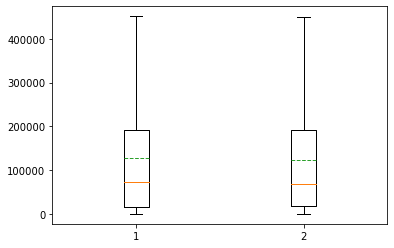

In [43]:
df_movie_channel_final = pd.read_sql("""SELECT *
FROM (SELECT video.idx,
             video_name || ' ' || logo as names,
             video_name,
             video_description,
             video_id,
             upload_time,
             channel_idx,
             thumbnail_url,
             popularity,
             logo,
             jvv.views,
             check_time
      FROM video
               JOIN thumbnail_logo tl ON video.idx = tl.video_idx
               JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
                     FROM video_views AS vv
                     GROUP BY vv.video_idx, vv.views, vv.check_time
                     ORDER BY vv.video_idx, vv.check_time DESC) AS jvv ON video.idx = jvv.video_idx) joined_vv
WHERE (names ~ '.*결[ ]*말.*' OR names ~ '.*엔[ ]*딩.*' )
  AND channel_idx IN
      (12, 148, 156, 60, 17, 26, 94, 168, 55, 1588, 14, 133, 51, 161, 23, 70, 99, 211, 119, 30, 95, 117, 29, 83, 123,
       113, 38, 103, 147, 124, 220, 263, 215, 122, 66, 201, 71, 72, 163, 153, 2, 80, 182, 207, 76, 89, 172, 98, 9, 197);""", con=conn)

df_mcf_filter = pre(df_movie_channel_final)
plt.boxplot ([df_movie_channel.loc[df_mc_filter]['views'],df_movie_channel_final.loc[df_mcf_filter]['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)



영화 채널 영상, 영화 채널 중 결말 포함 영상

{'whiskers': [<matplotlib.lines.Line2D at 0x147db1cd748>,
 'caps': [<matplotlib.lines.Line2D at 0x147d9555dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x147bc1f9e88>,
 'medians': [<matplotlib.lines.Line2D at 0x147d9555f08>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x147adf85bc8>,
  <matplotlib.lines.Line2D at 0x147ac1f7bc8>]}

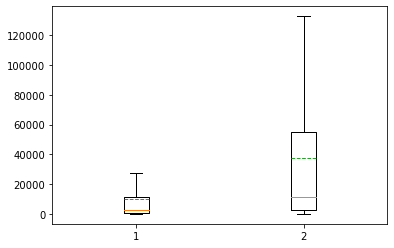

In [45]:
df_mask_video = pd.read_sql("""SELECT *
FROM (SELECT video.idx,
             video_name || ' ' || logo as names,
             video_name,
             video_description,
             video_id,
             upload_time,
             channel_idx,
             thumbnail_url,
             popularity,
             logo,
             jvv.views,
             check_time
      FROM video
               JOIN thumbnail_logo tl ON video.idx = tl.video_idx
               JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
                     FROM video_views AS vv
                     GROUP BY vv.video_idx, vv.views, vv.check_time
                     ORDER BY vv.video_idx, vv.check_time DESC) AS jvv ON video.idx = jvv.video_idx) joined_vv
WHERE (names ~ '.*x{2}.*' OR names ~ '.*X{2}.*' OR names ~ '.*\?{3}[ ]*:.*' or names ~ '.* 0{3}.*' or
       names ~ '.* o{3}.*' or names ~ '.* O{3}.*')""", con=conn)

df_mask_video_all_video = pd.read_sql("""
SELECT video.idx,
       video_name || ' ' || logo as names,
       video_name,
       video_description,
       video_id,
       upload_time,
       channel_idx,
       thumbnail_url,
       popularity,
       logo,
       jvv.views,
       check_time
FROM video
         JOIN thumbnail_logo tl ON video.idx = tl.video_idx
         JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
               FROM video_views AS vv
               GROUP BY vv.video_idx, vv.views, vv.check_time
               ORDER BY vv.video_idx, vv.check_time DESC) AS jvv
              ON video.idx = jvv.video_idx
WHERE channel_idx IN (SELECT temp.channel_idx
                      FROM (SELECT video_name || ' ' || logo as names, *
                            FROM video
                                     JOIN thumbnail_logo tl ON video.idx = tl.video_idx
                                     JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
                                           FROM video_views AS vv
                                           GROUP BY vv.video_idx, vv.views, vv.check_time
                                           ORDER BY vv.video_idx, vv.check_time DESC) AS jvv
                                          ON video.idx = jvv.video_idx) AS temp
                      WHERE (names ~ '.*x{2}.*' OR names ~ '.*X{2}.*' OR names ~ '.*\?{3}[ ]*:.*' or names ~ '.* 0{3}.*' or
       names ~ '.* o{3}.*' or names ~ '.* O{3}.*'));""", con=conn)

df_mv_filter = pre(df_mask_video)
df_mvav_filter = pre(df_mask_video_all_video)

plt.boxplot ([df_mask_video_all_video.loc[df_mvav_filter]['views'],df_mask_video.loc[df_mv_filter]['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)

마스크가 존재하는 영상을 가진 채널의 모든 영상의 조회수 분포, 마스크가 존재하는 영상의 조회수 분포


{'whiskers': [<matplotlib.lines.Line2D at 0x147ce972cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x147cf042c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x147cd4f6ac8>,
 'medians': [<matplotlib.lines.Line2D at 0x147ce771f88>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x147d04581c8>,
  <matplotlib.lines.Line2D at 0x147ce98a9c8>]}

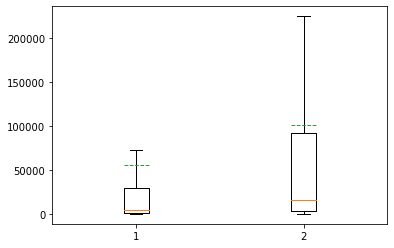

In [49]:
plt.boxplot ([df_mask_video_all_video['views'],df_mask_video['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)

마스크가 존재하는 영상을 가진 채널의 모든 영상의 조회수 분포, 마스크가 존재하는 영상의 조회수 분포
(outlier를 제거하지 않은 버전)

{'whiskers': [<matplotlib.lines.Line2D at 0x147ba4596c8>,
 'caps': [<matplotlib.lines.Line2D at 0x147ded84d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x147dce17f08>,
 'medians': [<matplotlib.lines.Line2D at 0x147ded84e88>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x147b20c4b48>,
  <matplotlib.lines.Line2D at 0x147c7c83b48>]}

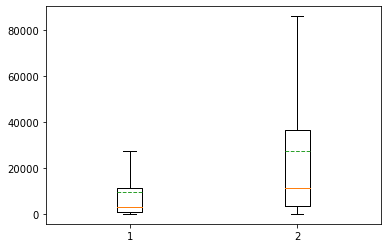

In [50]:
df_order_video = pd.read_sql("""SELECT *
FROM (SELECT video.idx,
             video_name || ' ' || logo as names,
             video_name,
             video_description,
             video_id,
             upload_time,
             channel_idx,
             thumbnail_url,
             popularity,
             logo,
             jvv.views,
             check_time
      FROM video
               JOIN thumbnail_logo tl ON video.idx = tl.video_idx
               JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
                     FROM video_views AS vv
                     GROUP BY vv.video_idx, vv.views, vv.check_time
                     ORDER BY vv.video_idx, vv.check_time DESC) AS jvv ON video.idx = jvv.video_idx) joined_vv
WHERE (names ~ '.*하[ ]*지[ ]*마[ ]*세[ ]*요.*' OR names ~ '.*하[ ]*셔[ ]*야[ ]*해[ ]*요.*' OR
                             names ~ '.*[^녕]하[ ]*세[ ]*요.*' OR names ~ '.*마[ ]*세[ ]*요.*' OR
                             names ~ '.*해[ ]*야[ ]*해[ ]*요.*')""", con=conn)

df_order_video_all_video = pd.read_sql("""
SELECT video.idx,
       video_name || ' ' || logo as names,
       video_name,
       video_description,
       video_id,
       upload_time,
       channel_idx,
       thumbnail_url,
       popularity,
       logo,
       jvv.views,
       check_time
FROM video
         JOIN thumbnail_logo tl ON video.idx = tl.video_idx
         JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
               FROM video_views AS vv
               GROUP BY vv.video_idx, vv.views, vv.check_time
               ORDER BY vv.video_idx, vv.check_time DESC) AS jvv
              ON video.idx = jvv.video_idx
WHERE channel_idx IN (SELECT temp.channel_idx
                      FROM (SELECT video_name || ' ' || logo as names, *
                            FROM video
                                     JOIN thumbnail_logo tl ON video.idx = tl.video_idx
                                     JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
                                           FROM video_views AS vv
                                           GROUP BY vv.video_idx, vv.views, vv.check_time
                                           ORDER BY vv.video_idx, vv.check_time DESC) AS jvv
                                          ON video.idx = jvv.video_idx) AS temp
                      WHERE (names ~ '.*하[ ]*지[ ]*마[ ]*세[ ]*요.*' OR names ~ '.*하[ ]*셔[ ]*야[ ]*해[ ]*요.*' OR
                             names ~ '.*[^녕]하[ ]*세[ ]*요.*' OR names ~ '.*마[ ]*세[ ]*요.*' OR
                             names ~ '.*해[ ]*야[ ]*해[ ]*요.*'));""", con=conn)

df_ov_filter = pre(df_order_video)
df_ovav_filter = pre(df_order_video_all_video)

plt.boxplot ([df_order_video_all_video.loc[df_ovav_filter]['views'],df_order_video.loc[df_ov_filter]['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)

명령형 비디오를 포함한 채널의 전체 영상, 명령형 비디오

{'whiskers': [<matplotlib.lines.Line2D at 0x147ceff9b08>,
 'caps': [<matplotlib.lines.Line2D at 0x147d5f67c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x147aa119ec8>,
 'medians': [<matplotlib.lines.Line2D at 0x147dd0a7a08>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x147dd0a7c08>,
  <matplotlib.lines.Line2D at 0x147d974cc88>]}

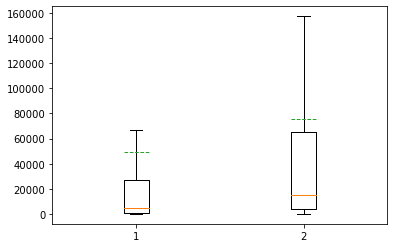

In [51]:
plt.boxplot ([df_order_video_all_video['views'],df_order_video['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)

명령형 비디오를 포함한 채널의 전체 영상, 명령형 비디오
(outlier를 제거하지 않은 버전)

{'whiskers': [<matplotlib.lines.Line2D at 0x147d79f4c48>,
 'caps': [<matplotlib.lines.Line2D at 0x147c762b4c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x147deb62d88>,
 'medians': [<matplotlib.lines.Line2D at 0x147c762b388>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x147bc3cb9c8>,
  <matplotlib.lines.Line2D at 0x147cce859c8>]}

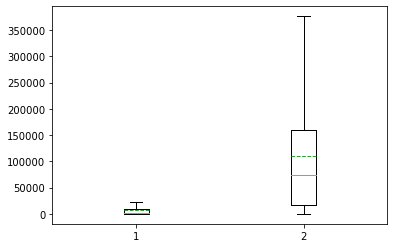

In [56]:
df_sprite_video = pd.read_sql("""SELECT *
FROM (SELECT video.idx,
             video_name || ' ' || logo as names,
             video_name,
             video_description,
             video_id,
             upload_time,
             channel_idx,
             thumbnail_url,
             popularity,
             logo,
             jvv.views,
             check_time
      FROM video
               JOIN thumbnail_logo tl ON video.idx = tl.video_idx
               JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
                     FROM video_views AS vv
                     GROUP BY vv.video_idx, vv.views, vv.check_time
                     ORDER BY vv.video_idx, vv.check_time DESC) AS jvv ON video.idx = jvv.video_idx) joined_vv
WHERE (names ~ '.*사[ ]*이[ ]*다.*' OR  names ~ '.*참[ ]*교[ ]*육.*')""", con=conn)

df_sprite_video_all_video = pd.read_sql("""
SELECT video.idx,
       video_name || ' ' || logo as names,
       video_name,
       video_description,
       video_id,
       upload_time,
       channel_idx,
       thumbnail_url,
       popularity,
       logo,
       jvv.views,
       check_time
FROM video
         JOIN thumbnail_logo tl ON video.idx = tl.video_idx
         JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
               FROM video_views AS vv
               GROUP BY vv.video_idx, vv.views, vv.check_time
               ORDER BY vv.video_idx, vv.check_time DESC) AS jvv
              ON video.idx = jvv.video_idx
WHERE channel_idx IN (SELECT temp.channel_idx
                      FROM (SELECT video_name || ' ' || logo as names, *
                            FROM video
                                     JOIN thumbnail_logo tl ON video.idx = tl.video_idx
                                     JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
                                           FROM video_views AS vv
                                           GROUP BY vv.video_idx, vv.views, vv.check_time
                                           ORDER BY vv.video_idx, vv.check_time DESC) AS jvv
                                          ON video.idx = jvv.video_idx) AS temp
                      WHERE (names ~ '.*사[ ]*이[ ]*다.*' OR  names ~ '.*참[ ]*교[ ]*육.*'));""", con=conn)

df_sv_filter = pre(df_sprite_video)
df_svav_filter = pre(df_sprite_video_all_video)

plt.boxplot ([df_sprite_video_all_video.loc[df_svav_filter]['views'],df_sprite_video.loc[df_sv_filter]['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)

사이다 비디오를 포함한 채널의 전체 영상, 사이다 비디오

{'whiskers': [<matplotlib.lines.Line2D at 0x147ac32ce08>,
 'caps': [<matplotlib.lines.Line2D at 0x147ac0a2c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x147ac0a2348>,
 'medians': [<matplotlib.lines.Line2D at 0x147ac2a3e88>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x147c49d7d48>,
  <matplotlib.lines.Line2D at 0x147aa0382c8>]}

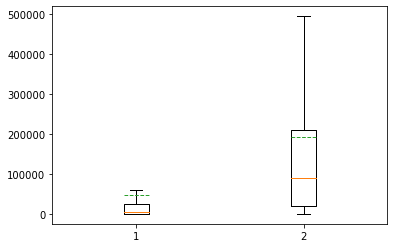

In [57]:
plt.boxplot ([df_sprite_video_all_video['views'],df_sprite_video['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)

사이다 비디오를 포함한 채널의 전체 영상, 사이다 비디오
(outlier를 제거하지 않은 버전)

{'whiskers': [<matplotlib.lines.Line2D at 0x147b5b3f788>,
 'caps': [<matplotlib.lines.Line2D at 0x14827297e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x147c237bec8>,
 'medians': [<matplotlib.lines.Line2D at 0x14827297f88>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x147d0b1dc48>,
  <matplotlib.lines.Line2D at 0x147ac75bbc8>]}

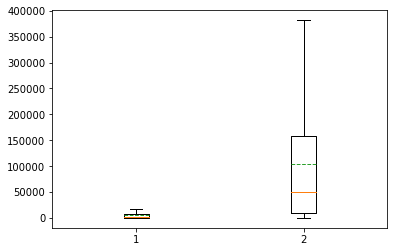

In [54]:
df_global_video = pd.read_sql("""SELECT *
FROM (SELECT video.idx,
             video_name || ' ' || logo as names,
             video_name,
             video_description,
             video_id,
             upload_time,
             channel_idx,
             thumbnail_url,
             popularity,
             logo,
             jvv.views,
             check_time
      FROM video
               JOIN thumbnail_logo tl ON video.idx = tl.video_idx
               JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
                     FROM video_views AS vv
                     GROUP BY vv.video_idx, vv.views, vv.check_time
                     ORDER BY vv.video_idx, vv.check_time DESC) AS jvv ON video.idx = jvv.video_idx) joined_vv
WHERE (names ~ '.*한[ ]*국.*' or names ~ '.*우[ ]*리[ ]*나[ ]*라.*' or names ~ '.*대[ ]*한[ ]*민[ ]*국.*')
  AND (names ~ '.*일[ ]*본.*' or names ~ '.*미[ ]*국.*' or names ~ '.*독[ ]*일.*' or names ~ '.*유[ ]*럽.*' or
       names ~ '.*해[ ]*외.*' or names ~ '.*강[ ]*대[ ]*국.*' or names ~ '.*선[ ]*진[ ]*국.*')""", con=conn)

df_global_video_all_video = pd.read_sql("""
SELECT video.idx,
       video_name || ' ' || logo as names,
       video_name,
       video_description,
       video_id,
       upload_time,
       channel_idx,
       thumbnail_url,
       popularity,
       logo,
       jvv.views,
       check_time
FROM video
         JOIN thumbnail_logo tl ON video.idx = tl.video_idx
         JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
               FROM video_views AS vv
               GROUP BY vv.video_idx, vv.views, vv.check_time
               ORDER BY vv.video_idx, vv.check_time DESC) AS jvv
              ON video.idx = jvv.video_idx
WHERE channel_idx IN (SELECT temp.channel_idx
                      FROM (SELECT video_name || ' ' || logo as names, *
                            FROM video
                                     JOIN thumbnail_logo tl ON video.idx = tl.video_idx
                                     JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
                                           FROM video_views AS vv
                                           GROUP BY vv.video_idx, vv.views, vv.check_time
                                           ORDER BY vv.video_idx, vv.check_time DESC) AS jvv
                                          ON video.idx = jvv.video_idx) AS temp
                      WHERE (names ~ '.*한[ ]*국.*' or names ~ '.*우[ ]*리[ ]*나[ ]*라.*' or names ~ '.*대[ ]*한[ ]*민[ ]*국.*')
  AND (names ~ '.*일[ ]*본.*' or names ~ '.*미[ ]*국.*' or names ~ '.*독[ ]*일.*' or names ~ '.*유[ ]*럽.*' or
       names ~ '.*해[ ]*외.*' or names ~ '.*강[ ]*대[ ]*국.*' or names ~ '.*선[ ]*진[ ]*국.*'));""", con=conn)

df_gv_filter = pre(df_global_video)
df_gvav_filter = pre(df_global_video_all_video)

plt.boxplot ([df_global_video_all_video.loc[df_gvav_filter]['views'],df_global_video.loc[df_gv_filter]['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)

한국+해외 비디오를 포함한 채널의 전체 영상, 한국+해외 비디오

{'whiskers': [<matplotlib.lines.Line2D at 0x147b24df348>,
 'caps': [<matplotlib.lines.Line2D at 0x147cf164908>,
 'boxes': [<matplotlib.lines.Line2D at 0x147ae029a88>,
 'medians': [<matplotlib.lines.Line2D at 0x147cf164d08>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x147cf164ec8>,
  <matplotlib.lines.Line2D at 0x147d45eff08>]}

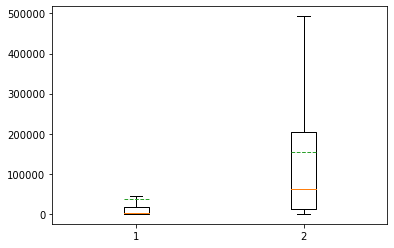

In [58]:
plt.boxplot ([df_global_video_all_video['views'],df_global_video['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)

한국+해외 비디오를 포함한 채널의 전체 영상, 한국+해외 비디오
(outlier 제거)

{'whiskers': [<matplotlib.lines.Line2D at 0x1efce3caa48>,
 'caps': [<matplotlib.lines.Line2D at 0x1efcc2638c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efab025048>,
 'medians': [<matplotlib.lines.Line2D at 0x1efcef83d88>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x1efce057688>,
  <matplotlib.lines.Line2D at 0x1efcefe7408>]}

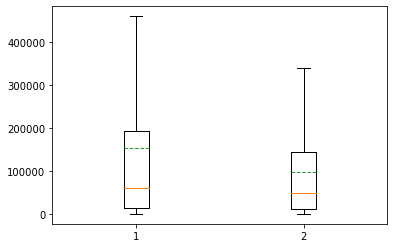

In [16]:
df_clustered_video = pd.read_sql("""
SELECT *
FROM (SELECT video.idx,
             video_name || ' ' || logo as names,
             video_name,
             video_description,
             video_id,
             upload_time,
             channel_idx,
             thumbnail_url,
             popularity,
             logo,
             jvv.views,
             check_time
      FROM video
               JOIN thumbnail_logo tl ON video.idx = tl.video_idx
               JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
                     FROM video_views AS vv
                     GROUP BY vv.video_idx, vv.views, vv.check_time
                     ORDER BY vv.video_idx, vv.check_time DESC) AS jvv ON video.idx = jvv.video_idx) joined_vv
WHERE channel_idx IN
      (2232, 2490, 1069, 2038, 2584, 2451, 2385, 2396, 3387, 1063, 2411, 1292, 1770, 1787, 2007, 2393, 2372, 2394, 2386,
       2387, 2373, 2389, 2471, 2488, 2467, 2476, 2477, 2439, 2544, 2355, 2425, 2422, 2417, 2412, 2408, 2410, 2406, 2401,
       2621, 3284)
""", con=conn)


df_cv_filter = pre(df_clustered_video)

plt.boxplot ([df_clustered_video['views'],df_clustered_video.loc[df_cv_filter]['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1efce7c6888>,
 'caps': [<matplotlib.lines.Line2D at 0x1efce7d9b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efce7d5f88>,
 'medians': [<matplotlib.lines.Line2D at 0x1efce7e0c08>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x1efce7e5788>,
  <matplotlib.lines.Line2D at 0x1efce7fd708>]}

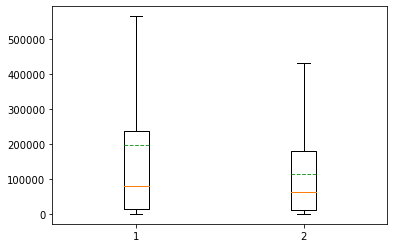

In [17]:
df_clustered_video = pd.read_sql("""
SELECT *
FROM (SELECT video.idx,
             video_name || ' ' || logo as names,
             video_name,
             video_description,
             video_id,
             upload_time,
             channel_idx,
             thumbnail_url,
             popularity,
             logo,
             jvv.views,
             check_time
      FROM video
               JOIN thumbnail_logo tl ON video.idx = tl.video_idx
               JOIN (SELECT DISTINCT ON (vv.video_idx) vv.views, vv.video_idx, vv.check_time
                     FROM video_views AS vv
                     GROUP BY vv.video_idx, vv.views, vv.check_time
                     ORDER BY vv.video_idx, vv.check_time DESC) AS jvv ON video.idx = jvv.video_idx) joined_vv
WHERE channel_idx IN
      (26, 66, 71, 112, 200, 206, 134, 14, 17, 30, 43, 38, 55, 98, 51, 52, 60, 70, 94, 85, 89, 115, 122, 138, 148, 156,
       171, 172, 169, 181, 182, 197, 211, 99, 218, 1588)
""", con=conn)


df_cv_filter = pre(df_clustered_video)

plt.boxplot ([df_clustered_video['views'],df_clustered_video.loc[df_cv_filter]['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)

In [3]:
df = pd.read_csv(r'D:\movie_channel_target.csv')

In [4]:
df_cutted = pd.qcut(df['views'], 2, labels=[2,1])
df_cutted.value_counts()

2    4630
1    4629
Name: views, dtype: int64

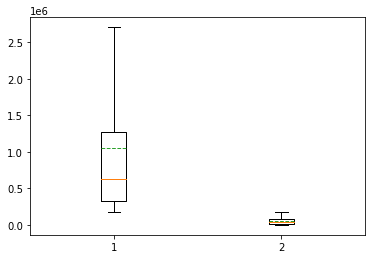

In [5]:
df_1 = df.loc[df_cutted.values == 1]
df_2 = df.loc[df_cutted.values == 2]
# df_3 = df.loc[df_cutted.values == 3]
# df_4 = df.loc[df_cutted.values == 4]
# df_5 = df.loc[df_cutted.values == 5]

plt.boxplot([df_1['views'],df_2['views']], meanline=True, showmeans=True, showcaps=True,
                showbox=True, showfliers=False)

df_1.to_csv('df_2_1.csv')
df_2.to_csv('df_2_2.csv')
# df_3.to_csv('df_3_3.csv')
# df_4.to_csv('df_5_4.csv')
# df_4.to_csv('df_5_5.csv')

In [23]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852 entries, 1852 to 3703
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idx                1852 non-null   int64  
 1   names              1852 non-null   object 
 2   video_name         1852 non-null   object 
 3   video_description  1826 non-null   object 
 4   video_id           1852 non-null   object 
 5   upload_time        1852 non-null   object 
 6   channel_idx        1852 non-null   int64  
 7   thumbnail_url      1852 non-null   object 
 8   popularity         1852 non-null   float64
 9   logo               1356 non-null   object 
 10  views              1852 non-null   int64  
 11  check_time         1852 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 268.1+ KB


In [110]:
df_1['names'].tail(10).map(pre)

2305         오x가즘 총을 쏘는 신개념 슈퍼히어로 영화리뷰 결말포함 한번만 00 오르가즘 총
2306                        아이언맨 로다주의 새로운 컴백작 형 돌아 왔어 rdj
2307                         9명의 남녀가 한달간 합숙하면 큰일나는 이유 썸바디
2308                              영화 보헤미안 랩소디 우리는 몰랐던 이야기
2309    돈에 눈 먼 백수남녀가 함께 술마시면 안 되는 이유 리얼 병맛영화 으응 음 이게 꿈...
2310        외계 침공으로 망해버린 지구에서 살아남기 결말포함 지구 열망 1 일차 우리 어쩌나
2311    2048년 전세계의 90 가 바다속에 잠겨버린 미래 영화리뷰 결말포함 지구 침몰 오...
2312           게임에서 사귄 여친을 실제로 만나면 벌어지는 일 보스몹 잡고 나랑 사귈 사람
2313      최첨단 광학 슈트를 발명해버린 전 세계가 인정한 소시오패스 과학자 광학 나노 슈트 다
2314            일어설 수 없는 소녀에게 막 출소한 삼촌이 나타나면 벌어지는 일 대선 토론
Name: names, dtype: object

In [6]:
import re

def pre(text):
    text = text.strip().lower()
    # text = re.sub('[^ 0-9ㄱ-ㅣ가-힣a-z:/_.\'\",~!?`#%^&*{}()]+', '', text)
    text = re.sub('http.*', '', text)
    text = re.sub('[0-9]{1,3}:[0-9]{1,2}', ' ', text)
    # text = re.sub('[^ 0-9ㄱ-ㅣ가-힣a-z!?.,\'\"~`#%^&*(){}]+', ' ', text)
    text = re.sub('[^ 0-9ㄱ-ㅣ가-힣a-z]', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub(' {2,}', ' ', text)
    return text.strip()

In [7]:
from konlpy.tag import Okt
okt = Okt()

In [8]:
from collections import Counter
from itertools import chain

df_1_words = [okt.morphs(v) for v in df_1['names'].values]
df_1_words = list(chain(*df_1_words))
df_1_words

df_2_words = [okt.morphs(v) for v in df_2['names'].values]
df_2_words = list(chain(*df_2_words))
df_2_words

# df_3_words = [okt.morphs(v) for v in df_3['names'].values]
# df_3_words = list(chain(*df_3_words))
# df_3_words

# df_4_words = [okt.morphs(v) for v in df_4['names'].values]
# df_4_words = list(chain(*df_4_words))
# df_4_words
#
# df_5_words = [okt.morphs(v) for v in df_5['names'].values]
# df_5_words = list(chain(*df_5_words))
# df_5_words

['여자',
 '가',
 '남자',
 '몰래',
 '술',
 '을',
 '버리는',
 '충격',
 '적',
 '인',
 '이유',
 '(',
 '반전',
 '주의',
 ')',
 '우주',
 '에서',
 '외계인',
 '들',
 '한테',
 '쫓기던',
 '썰',
 '푼다',
 '[',
 '영화리뷰',
 '결말',
 '포함',
 ']',
 '#',
 '오지',
 '망',
 '13',
 '오늘',
 '도',
 '지구',
 '는',
 '망했다',
 '.',
 '미래',
 '우주',
 '피난',
 '기',
 '대',
 '환',
 '창',
 '어산',
 '일',
 '럼',
 '엔드게임',
 '이후',
 '우리',
 '가',
 '집중',
 '해야',
 '되는',
 '히어로',
 '들',
 'D',
 '제',
 '내',
 '가',
 '1',
 '위',
 '야',
 '빙',
 '하기',
 ',',
 '죽어가던',
 '늑대',
 '를',
 '키워',
 '사냥',
 '의',
 '신',
 '이',
 '된',
 '남자',
 '늑대',
 '야',
 '!',
 '재',
 '물어',
 '와',
 '!',
 '[',
 '이',
 '사',
 '집',
 '리뷰',
 ']',
 '구',
 '불',
 '이사',
 '했당',
 '~!',
 '데드풀',
 '이',
 '좀비',
 '가',
 '되면',
 '벌어지는',
 '일',
 '_',
 '대',
 '환',
 '장',
 '파티',
 '이상한',
 '비행기',
 '에',
 '타',
 '버렸다',
 '..?',
 '[',
 '뭅뭅픽',
 ']',
 '롤러코스터',
 '1',
 '부',
 'l',
 '하정우',
 'l',
 '개인',
 '위생',
 '비행기',
 '뜨기',
 '전',
 '이',
 '곳',
 '에선',
 '무슨',
 '일',
 '이',
 '?',
 '클러',
 '코스터',
 '1',
 '부',
 ':',
 '바다',
 '를',
 '통치',
 '하는',
 '히어로',
 'ㅣ',
 '아쿠아',
 '맨',
 'ㅣ',
 '(',
 '영화리뷰',


In [9]:
count_words = Counter(df_1_words)
res = {k: v for k, v in sorted(dict(count_words).items(), key=lambda item: item[1], reverse=True)}
df_1_words_count = {k:v for k,v in res.items() if len(k) >= 2}

count_words = Counter(df_2_words)
res = {k: v for k, v in sorted(dict(count_words).items(), key=lambda item: item[1], reverse=True)}
df_2_words_count = {k:v for k,v in res.items() if len(k) >= 2}

# count_words = Counter(df_3_words)
# res = {k: v for k, v in sorted(dict(count_words).items(), key=lambda item: item[1], reverse=True)}
# df_3_words_count = {k:v for k,v in res.items() if len(k) >= 2}

# count_words = Counter(df_4_words)
# res = {k: v for k, v in sorted(dict(count_words).items(), key=lambda item: item[1], reverse=True)}
# df_4_words_count = {k:v for k,v in res.items() if len(k) >= 2}
#
# count_words = Counter(df_5_words)
# res = {k: v for k, v in sorted(dict(count_words).items(), key=lambda item: item[1], reverse=True)}
# df_5_words_count = {k:v for k,v in res.items() if len(k) >= 2}

In [11]:
df_words = list(df_1_words_count.keys()) + list(df_2_words_count.keys())
df_words_count = Counter(df_words)

In [16]:
df_filter_words = [k for k,v in df_words_count.items() if v >= 2]
df_filter_words

['결말',
 '포함',
 '영화',
 '영화리뷰',
 '..',
 '에서',
 '하는',
 '남자',
 '리뷰',
 '으로',
 '이유',
 '여자',
 '사람',
 '에게',
 '벌어지는',
 '버린',
 '인간',
 '뭅뭅픽',
 '정리',
 '좀비',
 '!!',
 '지구',
 '천재',
 '명장',
 '최후',
 '되는',
 '어벤져스',
 '최고',
 '모음',
 '인류',
 '주의',
 '실화',
 '마블',
 '소녀',
 '방법',
 '충격',
 '세상',
 '있는',
 '우리',
 '하면',
 '이야기',
 '진짜',
 '엔드게임',
 '...',
 '장면',
 '인생',
 '100',
 '비밀',
 '미국',
 '최강',
 '까지',
 '10',
 '미친',
 '버리는',
 '스토리',
 '없는',
 '역대',
 '명대사',
 '괴물',
 '한국',
 '미래',
 '위해',
 '사랑',
 '모든',
 '시간',
 '전설',
 '병맛',
 '세계',
 '너무',
 '바이러스',
 '아이',
 '가지',
 '드라마',
 '가장',
 'ㅋㅋㅋ',
 '추천',
 '극장판',
 '아이언맨',
 'ㄷㄷ',
 '아들',
 '무비',
 '생기는',
 '외계인',
 '노스',
 '짱구',
 '인피니티',
 '??',
 '소년',
 '게임',
 '시리즈',
 '경찰',
 '반전',
 '로봇',
 'VS',
 '영상',
 '범죄',
 '야한',
 '넷플릭스',
 'vs',
 '보다',
 '][',
 '아빠',
 '절대',
 '악마',
 '전쟁',
 '안되는',
 '당신',
 '정체',
 '살인',
 '아내',
 '오늘',
 '공포',
 '되어',
 'ㅋㅋ',
 'VIEW',
 '잘못',
 '하고',
 '일진',
 '멸망',
 '엄마',
 '그녀',
 '보면',
 '벌어진',
 '미녀',
 '고질라',
 '만든',
 '고수',
 '일본',
 '비하인드',
 '등장',
 '생존',
 '시작',
 '남편',
 '액션',
 '만에',
 '우주',
 '코미디',
 '라고

In [17]:
# df_1_words_count
df_1_filtered_words_count = {k:v for k,v in df_1_words_count.items() if k not in df_filter_words and v >= 3}
df_2_filtered_words_count = {k:v for k,v in df_2_words_count.items() if k not in df_filter_words and v >= 3}
df_1_words_count = {k:v for k,v in df_1_words_count.items()}
df_2_words_count = {k:v for k,v in df_2_words_count.items()}
# df_3_filtered_words_count = {k:v for k,v in df_3_words_count.items() if k not in df_filter_words and v >= 3}
# df_4_filtered_words_count = {k:v for k,v in df_4_words_count.items() if k not in df_filter_words and v >= 3}
# df_5_filtered_words_count = {k:v for k,v in df_5_words_count.items() if k not in df_filter_words and v >= 3}

In [18]:
df_1_words_count

{'결말': 1056,
 '포함': 1023,
 '영화': 809,
 '영화리뷰': 616,
 '..': 591,
 '에서': 421,
 '하는': 334,
 '남자': 327,
 '리뷰': 320,
 '으로': 271,
 '이유': 263,
 '여자': 253,
 '사람': 244,
 '에게': 236,
 '벌어지는': 226,
 '버린': 206,
 '인간': 197,
 '뭅뭅픽': 193,
 '정리': 193,
 '좀비': 191,
 '!!': 189,
 '지구': 144,
 '천재': 130,
 '명장': 126,
 '최후': 125,
 '되는': 125,
 '어벤져스': 120,
 '최고': 119,
 '모음': 116,
 '인류': 114,
 '주의': 113,
 '실화': 112,
 '마블': 112,
 '소녀': 107,
 '방법': 106,
 '충격': 104,
 '세상': 103,
 '있는': 102,
 '우리': 100,
 '하면': 100,
 '이야기': 96,
 '진짜': 94,
 '엔드게임': 94,
 '...': 93,
 '장면': 92,
 '인생': 89,
 '100': 88,
 '비밀': 88,
 '미국': 88,
 '최강': 87,
 '까지': 87,
 '10': 86,
 '미친': 85,
 '버리는': 82,
 '스토리': 82,
 '없는': 82,
 '역대': 81,
 '명대사': 81,
 '괴물': 80,
 '한국': 80,
 '미래': 80,
 '위해': 80,
 '사랑': 79,
 '모든': 79,
 '시간': 76,
 '전설': 76,
 '병맛': 73,
 '세계': 72,
 '너무': 72,
 '바이러스': 72,
 '아이': 71,
 '가지': 71,
 '드라마': 71,
 '가장': 71,
 'ㅋㅋㅋ': 70,
 '추천': 70,
 '극장판': 70,
 '아이언맨': 69,
 'ㄷㄷ': 68,
 '아들': 68,
 '무비': 67,
 '생기는': 65,
 '외계인': 65,
 '노스': 65,
 '짱구': 63,